## Metodo di Metropolis Hastings (prova)

In [13]:
import numpy as np
import random as ran
import matplotlib.pyplot as plt
from time import time

μ,σ = 3,4
p = lambda x: np.exp(-(x - μ)**2/(2*σ**2))/(np.sqrt(2*np.pi)*σ)

x0 = 16
δ  = 19

N     = int(1 * 10**6)
first = int(N/100 * 0.05)
last  = int(N/100 * 0.05)

Sample = [x0]
Sum = x0
Sum2 = x0**2

t=time()
rej = 0
xi = x0
for i in range(N):
    x = ran.uniform(xi-δ, xi+δ)
    if p(x) >= p(xi):
        Sample.append(x)
        xi = x
        Sum+=xi
        Sum2+=xi**2
    else:
        ξ = ran.random()
        if p(xi)*ξ <= p(x):
            Sample.append(x)
            xi = x
            Sum+=xi
            Sum2+=xi**2
        else:
            Sample.append(xi)
            Sum+=xi
            Sum2+=xi**2
            rej+=1

acc = N - rej
m = Sum/N
s = np.sqrt( 1/(N-1)*(Sum2 - Sum**2/N))
t1=time()-t

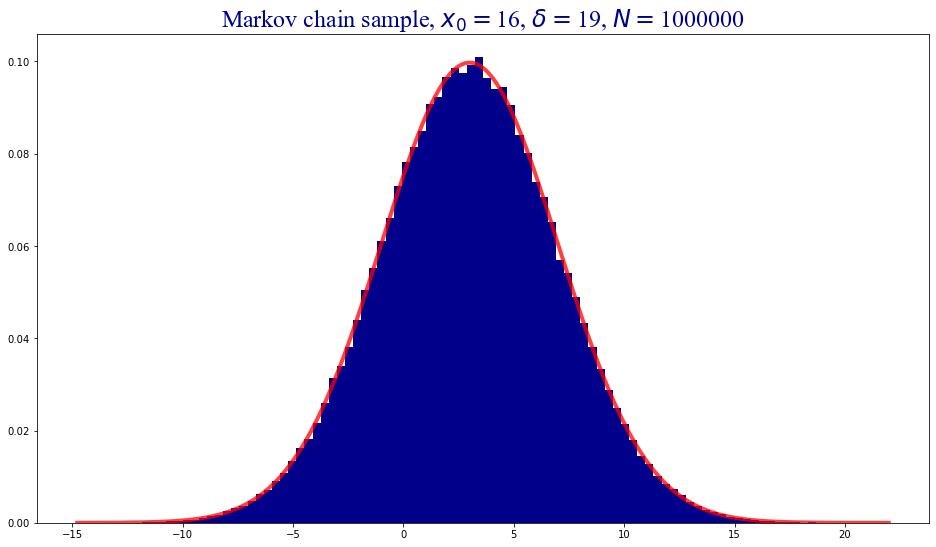

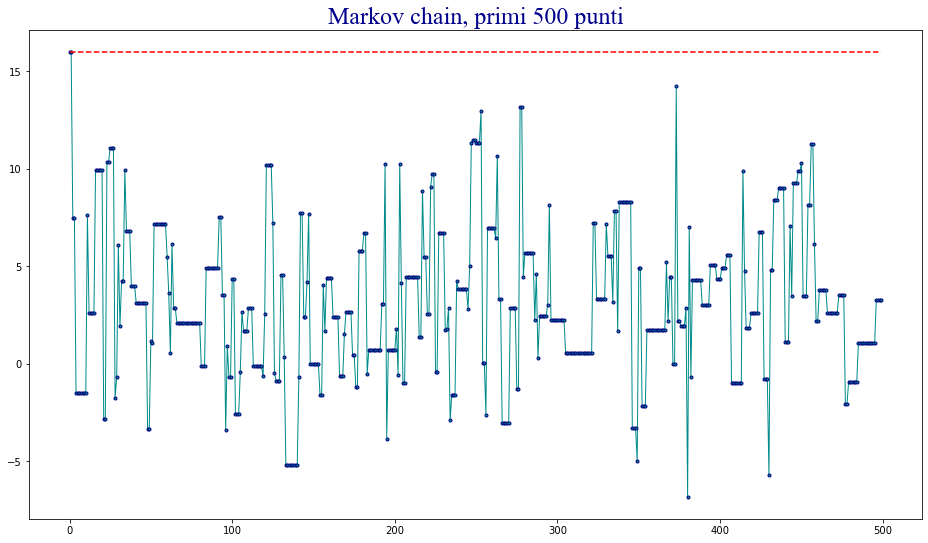

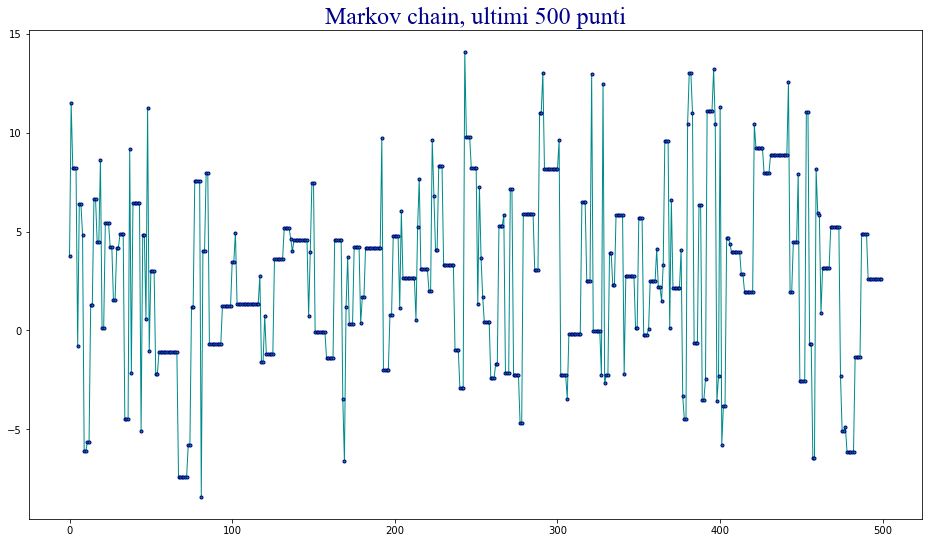

Tempo:     t = 18.28299 s

Media:     m = 3.0048 ; μ = 3
Dev. st:   s = 4.00372 ; σ = 4 

ε media:   ε = 0.16 %
ε dev.st.: ε = 0.093 %

Sample min   = -14.78313
Sample max   = 21.98853 

Accettati: 332993 su 1000000 ; il 33.3 %
Rifiutati: 667007 su 1000000 ; il 66.7 %


In [14]:
t=time()
X=np.linspace(min(Sample),max(Sample),2000)
font1={'family':'times new roman','color':'darkblue','size':24}

plt.figure(figsize=(16,9))
plt.title('Markov chain sample, $x_0=$'+str(round(x0,3))+', $\delta=$'+str(round(δ,3))+', $N=$'+str(N),fontdict=font1)
plt.hist(Sample,bins=100,density=True,color='darkblue')
plt.plot(X,p(X),c='r',lw=4,alpha=0.75)
plt.show()

plt.figure(figsize=(16,9))
plt.title('Markov chain, primi '+str(first)+' punti',fontdict=font1)
plt.plot(Sample[:first],'o-',c='darkcyan',mec='navy',ms=3,lw=1)
plt.plot([0,first-1],[x0,x0],'--r')
plt.show()

plt.figure(figsize=(16,9))
plt.title('Markov chain, ultimi '+str(last)+' punti',fontdict=font1)
plt.plot(Sample[-last:],'o-',c='darkcyan',mec='navy',ms=3,lw=1)
plt.show()
t2=time()-t
t=t1+t2

print('Tempo:     t =',round(t,5),'s\n')

print('Media:     m =',round(m,5),'; μ =',round(μ,5))
print('Dev. st:   s =',round(s,5),'; σ =',round(σ,5),'\n')

print('ε media:   ε =',round(100*abs((m-μ)/μ),3),'%')
print('ε dev.st.: ε =',round(100*abs((s-σ)/σ),3),'%\n')

print('Sample min   =',round(min(Sample),5))
print('Sample max   =',round(max(Sample),5),'\n')

print('Accettati:',acc,'su',N,'; il',round(acc/N*100,2),'%')
print('Rifiutati:',rej,'su',N,'; il',round(rej/N*100,2),'%')